In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

#Bibliotecas para processamento dos dados 
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.over_sampling import SMOTE

#Bibliotecas para previsão do modelo
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

# Biblioteca para avaliação o modelo
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

# CARGA DOS DADOS

In [102]:
df  = pd.read_csv('creditcard.csv')

# LIMPEZA DS DADOS

In [103]:
df = df.drop_duplicates()

In [217]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

# VISUALIZAÇÃO DO RELACIONAMENTO DOS PARES 

In [ ]:
sns.pairplot(df)

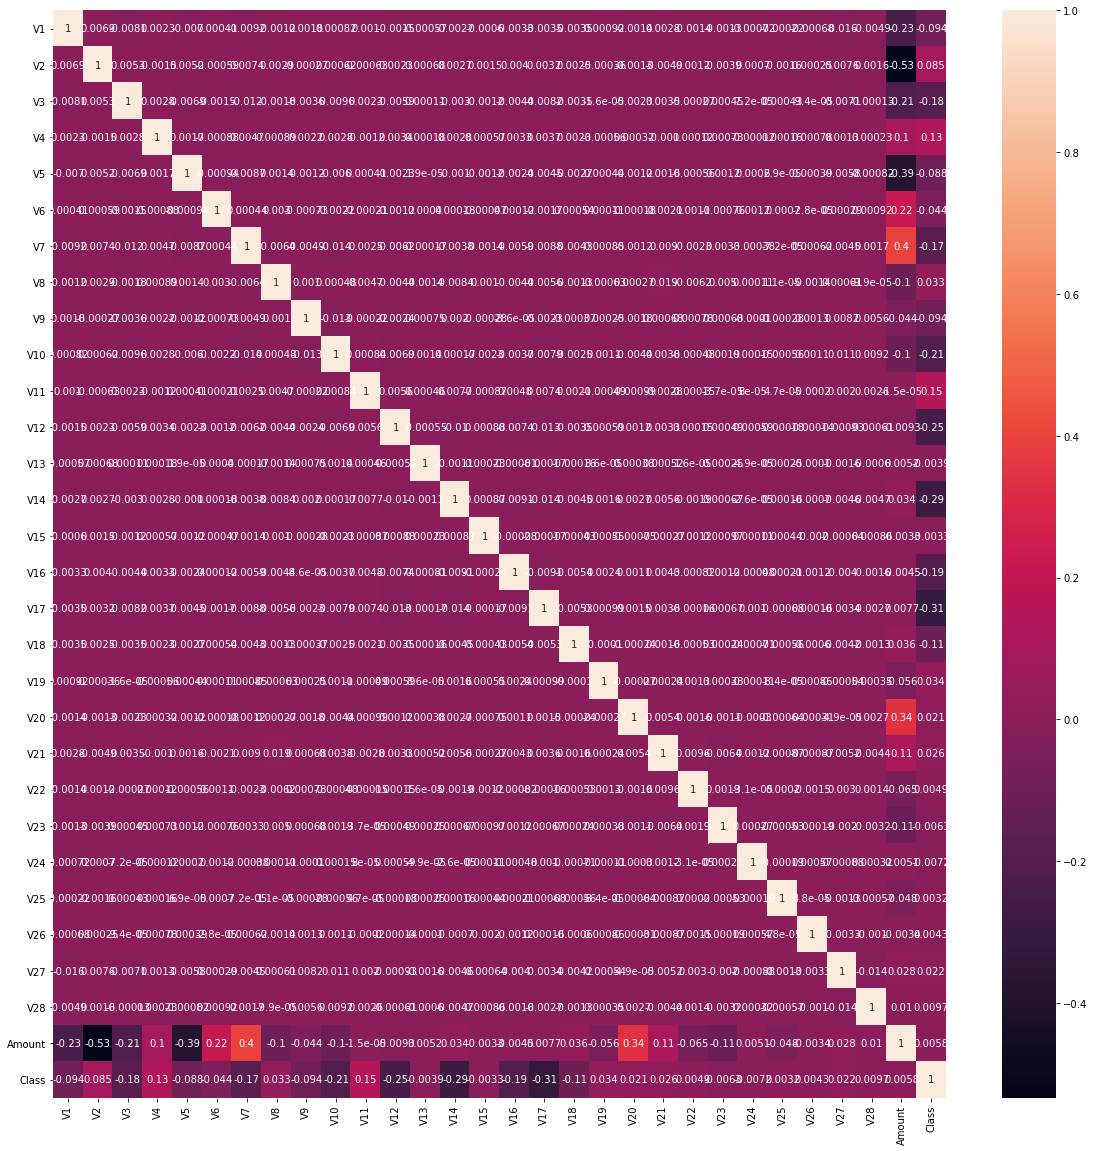

In [228]:
#criando um mapa de calor para ver as correlações 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot= True)

In [215]:
#Proporção de faude e não fraude
df['Class'].value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [227]:
df = df.drop('Time', axis='columns')

In [218]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


SEPARANDO AS VARIÁVEIS 

In [ ]:
X = df.drop('Class','Time' axis='columns')

In [105]:
y = df['Class']

# TREINO / TESTE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

NORMALIZANDO OS DADOS

In [107]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# BALANCEANDO OS DADOS

O BALANCEAMENTO FOI APENAS DO TRAINO, PARA MANTER OS DADOS DE TESTE REPRODUZINDO O QUE OCORRE NO MUNDO REAL

In [108]:
smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X_train, y_train)

y_sm.value_counts()

1    226602
0    226602
Name: Class, dtype: int64

# RandomForestClassifier

Customização de Hyper-Parâmetros

**n_estimators** : O número de árvores na floresta.

**critério** : A função para medir a qualidade de uma divisão. Os critérios suportados são “gini” para a impureza de Gini e “entropia” para o ganho de informação. Nota: este parâmetro é específico da árvore.

**max_depth** : A profundidade máxima da árvore. Se nenhum, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos do que min_samples_split amostras.

**class_weight** : Pesos associados às classes. Se não for dado, todas as classes devem ter peso um. 
O modo "balanceado" usa os valores de y para ajustar automaticamente os pesos inversamente proporcionais às frequências de classe nos dados de entrada como n_samples / (n_classes * np.bincount(y)).


In [186]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=300, class_weight = 'balanced',
                       random_state=42)

In [187]:
rfc = RandomForestClassifier()

In [188]:
rfc.fit(X_sm, y_sm)

RandomForestClassifier()

In [75]:
rfc_yhat = rfc.predict(X_test)

In [147]:
rfc_yprob = rfc.predict_proba(X_test)[:,1]

# AVALIAÇÃO DO MODELO

**MATRIZ DE CONFUSÃO**

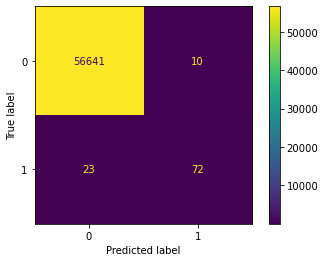

In [76]:
cm_rfc = confusion_matrix(y_test, rfc_yhat)
cm_display_rfc = ConfusionMatrixDisplay(cm_rfc).plot()

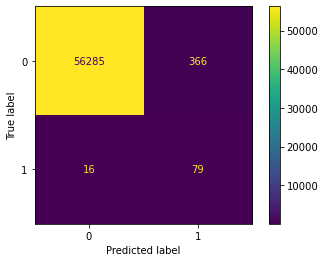

In [160]:
#diminuindo a sensibilidade do modelo em avaliar se é fraude. 
cm_rfc = confusion_matrix(y_test, rfc_yprob>0.05)
cm_display_rfc = ConfusionMatrixDisplay(cm_rfc).plot()

**CLASIFICATION REPORT**

In [77]:
target_names = ['class 0', 'class 1']
rfcc =(classification_report(y_test, rfc_yhat, target_names=target_names))
print(rfcc)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     56651
     class 1       0.88      0.76      0.81        95

    accuracy                           1.00     56746
   macro avg       0.94      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
f1_rfc = metrics.f1_score(y_test, qda_yhat)
f1_rfc

In [78]:
roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

0.9419192674631097

In [79]:
print('ROCAUC score:',roc_auc_score(y_test, rfc_yhat))

ROCAUC score: 0.8788591087257251


A curva AUC dá a idéia de quão bem as classes estão separadas
Um bom modelo é um modelo que pode separar bem as duas classes; portanto, quanto menor a interseção entre as duas classes que nosso modelo tiver, melhor será e consequentemente maior será a AUC.

In [128]:
rfc.predict_proba(X_test).shape

(56746, 2)

In [132]:
rfc.predict_proba(X_test)[:, 1]>=0.5

array([False, False, False, ..., False, False, False])

In [144]:
y1_score = rfc.predict_proba(X_test)[:,1]

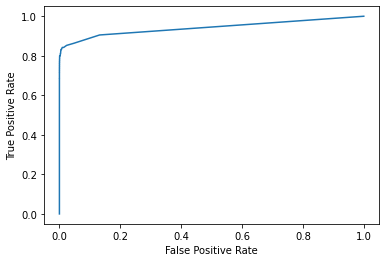

In [145]:
fpr, tpr, _ = roc_curve(y_test, y1_score, pos_label=rfc.classes_[1])
roc1_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

AUC fornece uma medida agregada de desempenho em todos os limites de classificação possíveis. Uma maneira de interpretar AUC é como a probabilidade de que o modelo classifique um exemplo positivo aleatório mais alto do que um exemplo negativo aleatório.

# IMPORTÂNCIA DE RECURSOS 

(FEATURE IMPORTANCES)

In [220]:
# Variáveis mais importantes no modelo em porcentagem de representatividade. 
importances = rfc.feature_importances_
importances 

array([0.00717485, 0.01185093, 0.03176708, 0.03351805, 0.10751155,
       0.00885108, 0.00849476, 0.03498552, 0.01443241, 0.01321179,
       0.15116928, 0.07531012, 0.07500997, 0.00706874, 0.2089606 ,
       0.00649264, 0.03491606, 0.06796401, 0.01477623, 0.00716522,
       0.00777071, 0.01165833, 0.00506851, 0.00510678, 0.00450668,
       0.00652943, 0.00780524, 0.01198015, 0.00865212, 0.01029117])

In [ ]:
features= X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 18)) # alterar tamanho
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');


Explica quanto cada variável explica o modelo apresnetado.